<a href="https://colab.research.google.com/github/HLCarbon/DeepLearning/blob/main/CNN_pizza_VS_hotdog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import zipfile

from tensorflow.keras import layers
from tensorflow import math
from keras.utils.vis_utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import pathlib
import os
import zipfile


Checking the GPU we are using

!nvidia-smi

#### Mount google drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Unzip Files


In [4]:
my_files = zipfile.ZipFile('/content/drive/MyDrive/Downloads.zip')
my_files.extractall()
my_files.close()

## Analyze Data

In [8]:
def display_random_image(dir:str, class_type:str):
  img_dir = dir + '/' + class_type
  files = os.listdir(img_dir)
  img_name = random.choice(files)
  img = mpimg.imread(img_dir + '/' + img_name)
  plt.imshow(img)
  plt.title(class_type)
  plt.axis('off')
  print(f'Image shape : {img.shape}')

Image shape : (512, 341, 3)


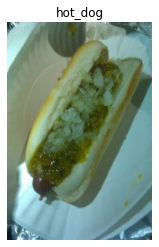

In [9]:
display_random_image('/content/hot_pizza', 'hot_dog')

###Prepare the data

In [11]:
# 256x256 (Batches of 32)
data_dir = '/content/hot_pizza'
training_data = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split = 0.2, 
                                                            subset = 'training', batch_size = 32, 
                                                            image_size = (256,256),
                                                            seed  = 66)

validation_data = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split = 0.2, 
                                                            subset = 'validation', batch_size = 32, 
                                                            image_size = (256,256),
                                                            seed  = 66)




Found 2000 files belonging to 2 classes.
Using 1600 files for training.
Found 2000 files belonging to 2 classes.
Using 400 files for validation.


In [13]:
class_names = training_data.class_names
print(class_names)

['hot_dog', 'pizza']


### Normalize the data

In [14]:
norm_layer = tf.keras.layers.Rescaling(1/255.)
training_data_norm = training_data.map(lambda x,y: (norm_layer(x), y))
validation_data_norm = validation_data.map(lambda x,y: (norm_layer(x), y))

In [16]:
image_batch, labels_bacth = next(iter(training_data_norm))
image_batch[0]

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[0.04346278, 0.03954121, 0.02385493],
        [0.04313726, 0.03921569, 0.02352941],
        [0.04313726, 0.03921569, 0.02352941],
        ...,
        [0.04901961, 0.02941177, 0.01372549],
        [0.04901961, 0.02941177, 0.01372549],
        [0.0509804 , 0.03137255, 0.01568628]],

       [[0.0460746 , 0.04215303, 0.02646676],
        [0.04411382, 0.04019225, 0.02450598],
        [0.04313726, 0.03921569, 0.02352941],
        ...,
        [0.04901961, 0.02941177, 0.01372549],
        [0.04901961, 0.02941177, 0.01372549],
        [0.0509804 , 0.03137255, 0.01568628]],

       [[0.04705883, 0.04313726, 0.02745098],
        [0.04672565, 0.04280408, 0.0271178 ],
        [0.04313726, 0.03921569, 0.02352941],
        ...,
        [0.04901961, 0.02941177, 0.01372549],
        [0.04901961, 0.02941177, 0.01372549],
        [0.0509804 , 0.03137255, 0.01568628]],

       ...,

       [[0.23007815, 0.06207874, 0.        ],
        [0.27

###Try non-cnn model on data

In [17]:
tf.random.set_seed(66)

model_1 = Sequential([
    Flatten(input_shape = (256,256, 3)),
    Dense(4, activation = 'relu'),
    Dense(4, activation = 'relu'),
    Dense(1, activation = 'sigmoid')])

model_1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy'])

history_1 = model_1.fit(training_data_norm, 
                        epochs = 5,
                        validation_data = validation_data_norm,
                        validation_steps = len(validation_data_norm))

Epoch 1/5
50/50 [==============================] - 8s 78ms/step - loss: 0.9259 - accuracy: 0.5125 - val_loss: 0.6937 - val_accuracy: 0.4650
Epoch 2/5
50/50 [==============================] - 5s 98ms/step - loss: 0.6932 - accuracy: 0.5088 - val_loss: 0.6940 - val_accuracy: 0.4650
Epoch 3/5
50/50 [==============================] - 5s 79ms/step - loss: 0.6931 - accuracy: 0.5088 - val_loss: 0.6940 - val_accuracy: 0.4650
Epoch 4/5
50/50 [==============================] - 4s 78ms/step - loss: 0.6931 - accuracy: 0.5088 - val_loss: 0.6944 - val_accuracy: 0.4650
Epoch 5/5
50/50 [==============================] - 4s 78ms/step - loss: 0.6930 - accuracy: 0.5088 - val_loss: 0.6942 - val_accuracy: 0.4650


In [18]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 196608)            0         
                                                                 
 dense (Dense)               (None, 4)                 786436    
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 786,461
Trainable params: 786,461
Non-trainable params: 0
_________________________________________________________________


### Non-CNN model with more layers

In [19]:
tf.random.set_seed(66)

model_2 = Sequential([
    Flatten(input_shape = (256,256, 3)),
    Dense(100, activation = 'relu'),
    Dense(100, activation = 'relu'),
    Dense(100, activation = 'relu'),
    Dense(1, activation = 'sigmoid')])

model_2.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy'])

history_2 = model_2.fit(training_data_norm, 
                        epochs = 10,
                        validation_data = validation_data_norm,
                        validation_steps = len(validation_data_norm))

Epoch 1/10
50/50 [==============================] - 5s 93ms/step - loss: 6.8341 - accuracy: 0.5312 - val_loss: 1.8481 - val_accuracy: 0.5750
Epoch 2/10
50/50 [==============================] - 4s 81ms/step - loss: 0.9168 - accuracy: 0.6306 - val_loss: 0.6777 - val_accuracy: 0.5825
Epoch 3/10
50/50 [==============================] - 4s 80ms/step - loss: 0.8391 - accuracy: 0.6313 - val_loss: 0.5828 - val_accuracy: 0.7050
Epoch 4/10
50/50 [==============================] - 4s 81ms/step - loss: 0.6455 - accuracy: 0.6837 - val_loss: 0.6674 - val_accuracy: 0.6325
Epoch 5/10
50/50 [==============================] - 4s 80ms/step - loss: 0.6011 - accuracy: 0.6988 - val_loss: 0.5791 - val_accuracy: 0.7050
Epoch 6/10
50/50 [==============================] - 4s 80ms/step - loss: 0.6806 - accuracy: 0.6744 - val_loss: 0.8023 - val_accuracy: 0.6575
Epoch 7/10
50/50 [==============================] - 5s 88ms/step - loss: 0.6711 - accuracy: 0.6837 - val_loss: 0.6181 - val_accuracy: 0.7100
Epoch 8/10
50

### Prepare CNN